In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas_profiling import ProfileReport

In [22]:
df = pd.read_csv(r'../Datasets/GOOGL.csv')
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343


In [23]:
# Calculate the forecasting column as the average of 'High' and 'Low'
df['Forecast'] = (df['High'] + df['Low']) / 2

In [24]:
# Convert the 'Date' column to datetime type and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

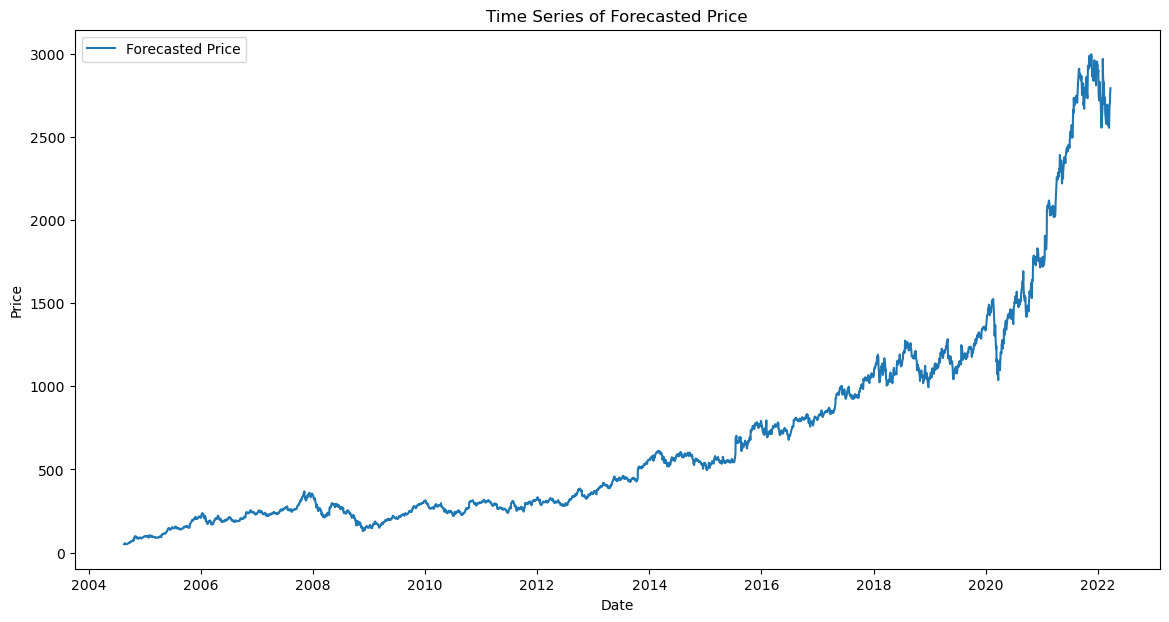

In [25]:
# Plot the time series of the forecasted price
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Forecast'], label='Forecasted Price')
plt.title('Time Series of Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['Forecast'], model='additive', period=365)

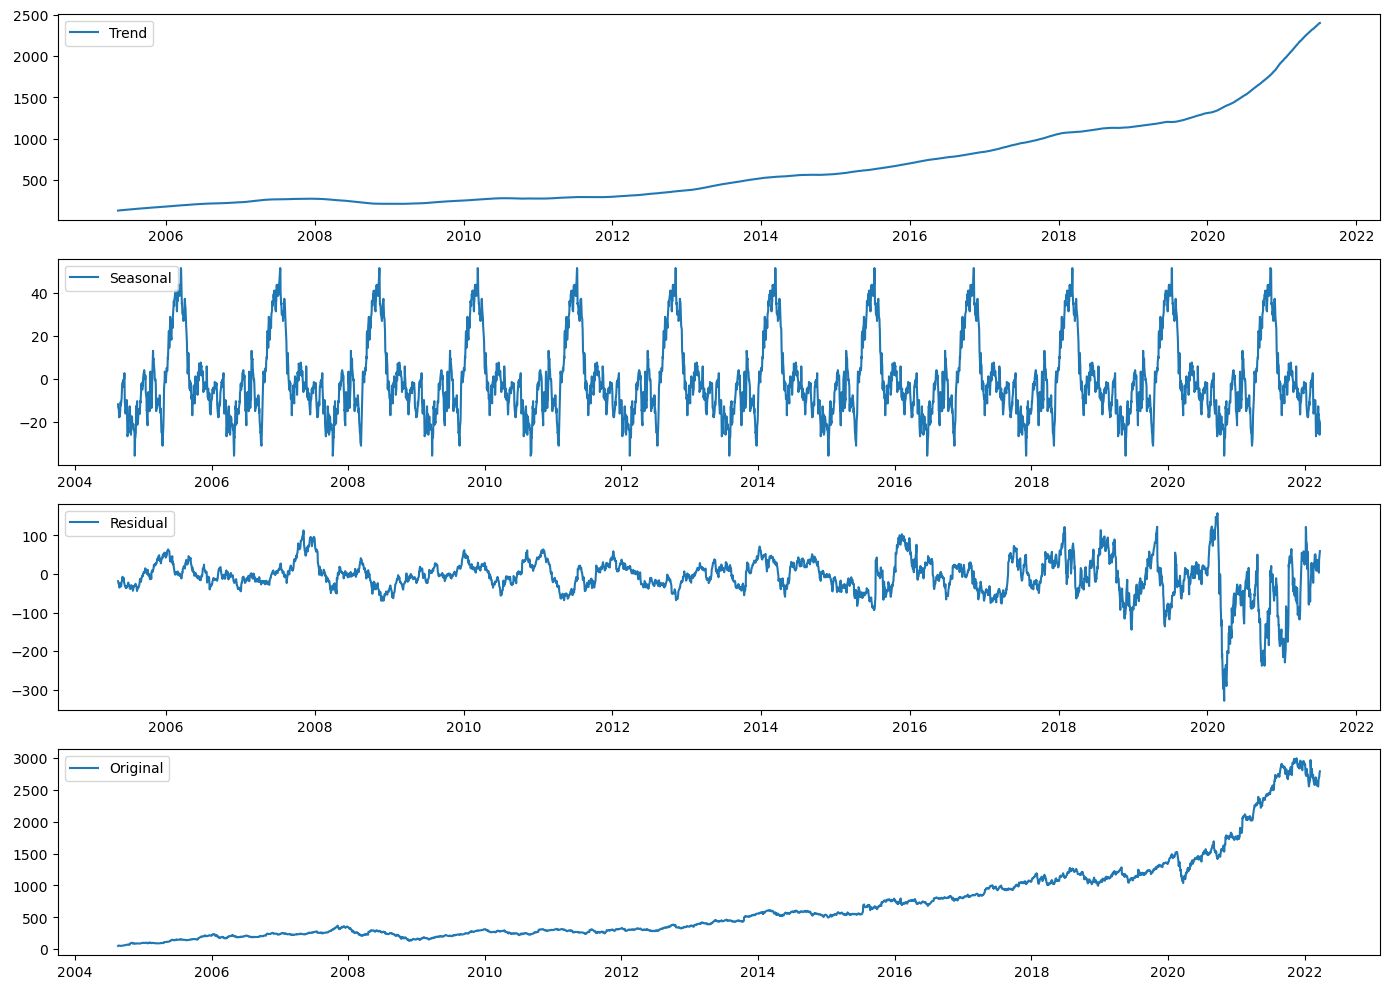

In [27]:
# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df['Forecast'], label='Original')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Forecast future values using an ARIMA model
model = ARIMA(df['Forecast'], order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

In [29]:
# Print the forecasted values
print(forecast)

4431    2796.945943
4432    2797.110949
4433    2797.119324
4434    2797.119749
4435    2797.119770
Name: predicted_mean, dtype: float64
